In [10]:
import polars as pl
import seaborn as sns 

In [11]:
data = pl.read_csv('./data/pitches.csv')
data

ab_id,pitcher,batter,i,b,s,o,pitch_type,mph,type,code,x0,y0,z0,px,pz,spin_rate,spin_dir,sz_bot,sz_top,pitch_num,end_speed,g_id,b_score,pitcher_team,on_1b,on_2b,on_3b,b_score_after_pitch
i64,str,str,i64,i64,i64,i64,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,i64,i64,str,f64,f64,f64,i64
2018003856,"""S.Romano""","""A.Eaton""",1,0,0,0,"""FT""",95.4,"""B""","""B""",-1.628619,50.0,6.398163,0.444047,1.207495,2875.281,221.465,1.425644,3.074842,1,87.2,201800050,0,"""CIN""",0.0,0.0,0.0,0
2018003856,"""S.Romano""","""A.Eaton""",1,1,0,0,"""FT""",95.0,"""S""","""C""",-1.576306,50.0,6.457097,0.587445,1.623533,2778.109,225.462,1.401167,3.105028,2,86.7,201800050,0,"""CIN""",0.0,0.0,0.0,0
2018003856,"""S.Romano""","""A.Eaton""",1,1,1,0,"""FT""",89.9,"""X""","""D""",-1.837934,50.0,6.386948,0.052704,2.266282,2310.241,218.536,1.231324,2.959774,3,82.8,201800050,0,"""CIN""",0.0,0.0,0.0,0
2018003857,"""S.Romano""","""A.Rendon""",1,0,0,0,"""FT""",95.2,"""S""","""C""",-2.086613,50.0,6.311156,-0.193338,2.964638,2827.717,219.436,1.496075,3.077617,1,86.0,201800050,0,"""CIN""",1.0,0.0,0.0,0
2018003857,"""S.Romano""","""A.Rendon""",1,0,1,0,"""FT""",95.4,"""S""","""S""",-1.923722,50.0,6.443138,-1.411895,1.669428,2999.029,236.059,1.271575,3.171093,2,86.3,201800050,0,"""CIN""",1.0,0.0,0.0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2018184911,"""N.Syndergaard""","""D.Dietrich""",9,3,1,1,"""SI""",97.3,"""X""","""X""",-0.353858,50.0,6.130186,-0.339681,1.959416,2333.279,233.434,1.534341,3.394896,5,87.8,201802422,0,"""NYN""",0.0,0.0,0.0,0
2018184912,"""N.Syndergaard""","""P.O'Brien""",9,0,0,2,"""CU""",84.0,"""S""","""C""",-0.538352,50.0,6.182889,0.355074,1.90797,508.185,91.034,1.896643,3.670996,1,76.4,201802422,0,"""NYN""",0.0,0.0,0.0,0
2018184912,"""N.Syndergaard""","""P.O'Brien""",9,0,1,2,"""SL""",91.5,"""B""","""B""",-0.390817,50.0,6.145811,1.393143,1.041036,590.426,143.154,1.749218,3.597419,2,84.2,201802422,0,"""NYN""",0.0,0.0,0.0,0


In [12]:
data.sample(n=25)

ab_id,pitcher,batter,i,b,s,o,pitch_type,mph,type,code,x0,y0,z0,px,pz,spin_rate,spin_dir,sz_bot,sz_top,pitch_num,end_speed,g_id,b_score,pitcher_team,on_1b,on_2b,on_3b,b_score_after_pitch
i64,str,str,i64,i64,i64,i64,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,i64,i64,str,f64,f64,f64,i64
2018154880,"""M.Castro""","""H.Dozier""",7,0,1,1,"""SI""",97.6,"""S""","""F""",-1.819385,50.0,4.806868,0.125541,1.662259,2285.528,241.732,1.623109,3.569529,2,90.1,201802026,3,"""BAL""",0.0,0.0,0.0,3
2018031110,"""C.Bedrosian""","""A.Hicks""",9,1,1,2,"""FF""",95.1,"""X""","""D""",-1.619215,50.0,5.858365,-0.141207,1.967366,2530.879,182.213,1.397581,3.285111,3,86.2,201800402,2,"""ANA""",0.0,0.0,0.0,2
2018141340,"""C.Knebel""","""H.Bader""",6,1,0,1,"""FF""",96.6,"""X""","""E""",-1.705179,50.0,5.944499,0.581443,2.353618,2009.531,200.635,1.558248,3.365463,2,88.2,201801848,4,"""MIL""",1.0,1.0,0.0,6
2018011544,"""E.Paredes""","""J.Gallo""",8,0,0,0,"""FF""",92.5,"""B""","""B""",-2.518045,50.0,5.438022,0.996368,3.104192,2195.322,217.954,1.536241,3.593054,1,82.0,201800148,1,"""ANA""",0.0,0.0,0.0,1
2018183048,"""J.Ross""","""D.LeMahieu""",1,2,2,1,"""CH""",87.8,"""S""","""F""",-1.951451,50.0,5.522279,-0.967493,1.853343,1328.363,231.247,1.541283,3.355493,6,81.8,201802398,0,"""WAS""",0.0,0.0,0.0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2018087018,"""J.Odorizzi""","""J.Profar""",2,0,0,0,"""FF""",88.4,"""B""","""H""",-0.626079,50.0,5.492653,2.528094,-1.205166,2533.605,214.964,1.535,3.371,1,81.0,201801139,0,"""MIN""",1.0,1.0,0.0,0
2018016536,"""H.Hembree""","""M.Machado""",6,2,0,0,"""FF""",91.4,"""X""","""X""",-0.799217,50.0,5.504431,-0.983172,3.204227,2217.764,199.689,1.519338,3.559905,3,81.8,201800213,1,"""BOS""",1.0,0.0,0.0,1
2018063856,"""D.Mengden""","""C.Arroyo""",5,2,1,1,"""FF""",92.4,"""X""","""X""",-0.311032,50.0,5.934815,-1.179175,2.519316,2058.211,215.236,1.40709,3.640629,4,85.4,201800833,0,"""OAK""",0.0,0.0,0.0,0


In [13]:
data[['mph', 'spin_rate']].describe()

statistic,mph,spin_rate
str,f64,f64
"""count""",29450.0,29450.0
"""null_count""",166.0,166.0
"""mean""",88.358329,1659.340572
"""std""",6.048993,665.6994
"""min""",57.9,4.149
"""25%""",84.2,1169.042
"""50%""",89.7,1827.101
"""75%""",93.0,2180.556
"""max""",104.3,4690.924


/Users/jorgecontreras/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


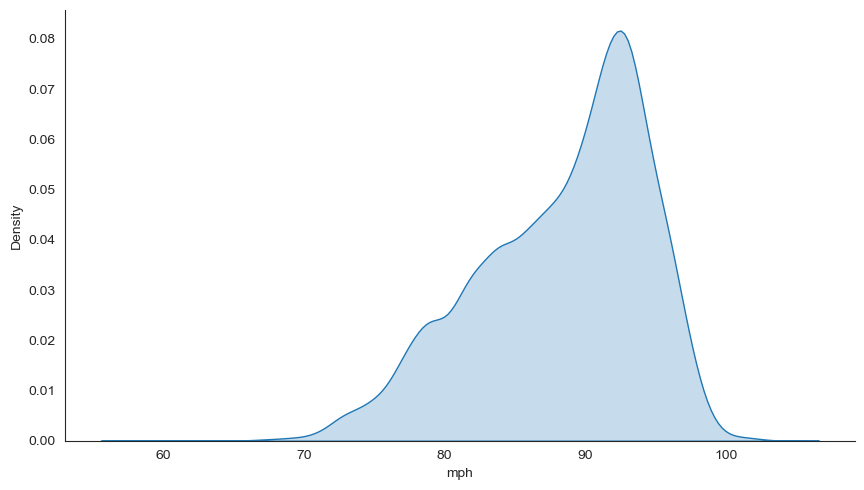

In [14]:
sns.set_style('white')
g = sns.displot(data, x='mph', kind='kde', fill=True, aspect=1.75)

/Users/jorgecontreras/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


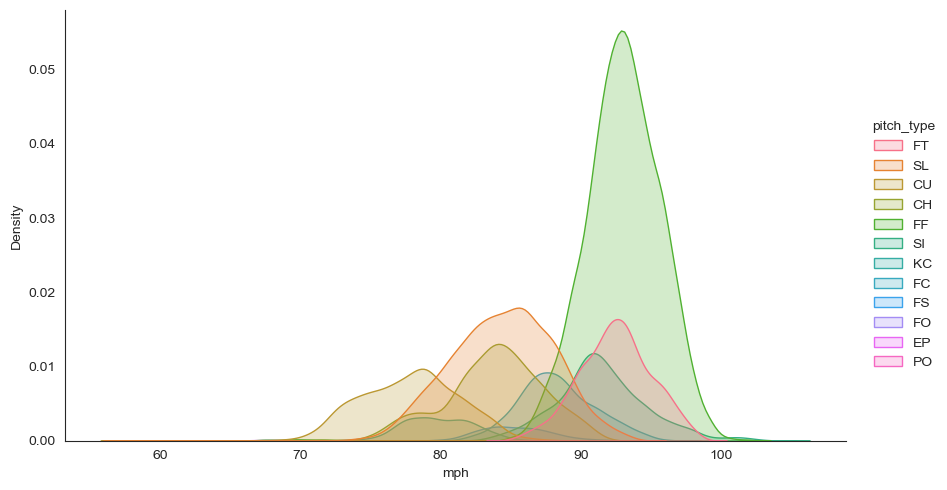

In [15]:
g = sns.displot(data, x='mph', kind='kde', fill=True, hue='pitch_type', aspect=1.75)